In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns
import warnings
from scipy.stats import entropy
from sklearn.cluster import DBSCAN

warnings.filterwarnings("ignore")
import os
import glob


def getDF(df_raw, featurename):
    #columnname = [featurename]
    #df_extract = df_raw.loc[:, columnname].copy()
    df_extract = df_raw.copy()

    #if 'Time' in df_raw.columns:
    #    df_extract.index = pd.to_datetime(df_raw["Time"],
    #                                      format='%Y-%m-%d %H:%M:%S')
    if 'date' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["date"], format='%Y-%m-%d')


    # Transfer datetime
    #     from datetime import datetime

    df_extract['DoW'] = [''] * len(df_extract)
    df_extract['Month'] = [''] * len(df_extract)
    df_extract['Date'] = [''] * len(df_extract)
    df_extract['Hour'] = [''] * len(df_extract)
    df_extract['Week'] = [''] * len(df_extract)
    df_extract['Minute'] = [''] * len(df_extract)

    for i,(indx, eachrow) in enumerate(df_extract.iterrows()):
        if i%50 == 0:
            print(i)
        df_extract['DoW'].loc[indx] = (indx.strftime('%A'))
        df_extract['Month'].loc[indx] = int(indx.month)
        df_extract['Date'].loc[indx] = (indx.strftime("%Y/%m/%d"))
        df_extract['Hour'].loc[indx] = int(indx.strftime("%H"))
        df_extract['Minute'].loc[indx] = int(indx.strftime("%M"))
        df_extract['Week'].loc[indx] = int(indx.strftime('%W'))
    return df_extract


def getDF_bymonth(df_raw, featurename, month):
    columnname = [featurename]
    df_extract = df_raw.loc[:, columnname].copy()
    if 'Time' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["Time"],
                                          format='%Y-%m-%d %H:%M:%S')

    # Transfer datetime
    #     from datetime import datetime

    df_extract['DoW'] = [''] * len(df_extract)
    df_extract['Month'] = [''] * len(df_extract)
    df_extract['Date'] = [''] * len(df_extract)
    df_extract['Hour'] = [''] * len(df_extract)
    df_extract['Week'] = [''] * len(df_extract)
    df_extract['Minute'] = [''] * len(df_extract)
    for indx, eachrow in df_extract.iterrows():
        df_extract['DoW'].loc[indx] = (indx.strftime('%A'))
        df_extract['Month'].loc[indx] = int(indx.month)
        df_extract['Date'].loc[indx] = (indx.strftime("%Y/%m/%d"))
        df_extract['Hour'].loc[indx] = int(indx.strftime("%H"))
        df_extract['Minute'].loc[indx] = int(indx.strftime("%M"))
        df_extract['Week'].loc[indx] = int(indx.strftime('%U'))
    df_monthsplit_extract = df_extract.loc[df_extract['Month'] == month]
    return df_monthsplit_extract

# Compute timeseries statistics and plot for individual patients

In [48]:
path = r''  # Specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

patient_unstrip_IDs = [i.split('_entries', 1)[0] for i in files]

patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]

df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

i = 0

for f in files:
    
    p = os.path.join(path, f)

    print("Patient ID: ", int(df_id_files.id[i]))

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")
    df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')

    df = df[~df.index.duplicated(keep='first')]  #remove duplicate indexes
    df = df[df['glucose'] > 39]  # remove everything less than 39
    df = df[df['glucose'] < 1000]  # remove everything greater than 40
    df['glucose'].values[
        df['glucose'] >
        400] = 400  # anything greater than 400 replace with 400

    df['Dateonly'] = df["Date"].str.split("/", n=2, expand=True)[2].astype(int)

    ## Plots and statistics

    print(df[["glucose", "DoW"]].groupby("DoW").describe())

    # make boxplot with Catplot
    a = sns.catplot(x='DoW',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=18.7 / 8.27,
                    order=('Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday'))

    # add data points to boxplot with stripplot
    a = sns.stripplot(x='DoW',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D',
                      order=('Monday', 'Tuesday', 'Wednesday', 'Thursday',
                             'Friday', 'Saturday', 'Sunday'))

    a.set(xlabel="Day", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Hour"]].groupby("Hour").describe())

    # make boxplot with Catplot
    b = sns.catplot(x='Hour',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=25.7 / 8.27)

    # add data points to boxplot with stripplot
    b = sns.stripplot(x='Hour',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')
    b.set(xlabel="Hour", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "day"]].groupby("day").describe())

    # make boxplot with Catplot
    c = sns.catplot(x='Month',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=18.7 / 8.27)

    # add data points to boxplot with stripplot
    c = sns.stripplot(x='Month',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')

    c.set(xlabel="day", ylabel="Glucose (mg/dL)")

    plt.show()

    print(df[["glucose", "Dateonly"]].groupby("Dateonly").describe())

    # make boxplot with Catplot
    d = sns.catplot(x='Dateonly',
                    y='glucose',
                    kind="box",
                    data=df,
                    height=4,
                    aspect=25.7 / 8.27)

    # add data points to boxplot with stripplot
    d = sns.stripplot(x='Dateonly',
                      y='glucose',
                      data=df,
                      alpha=0.2,
                      jitter=0.02,
                      color='#F36B4D')

    d.set(xlabel="Date of Month", ylabel="Glucose (mg/dL)")

    plt.show()
    print('=======' * 20)
    print('=======' * 20)

    i = i + 1

FileNotFoundError: [Errno 2] No such file or directory: ''

In [2]:
dir_ = "/home/reinhold/Daten/Paper_Datasets_Nov2022"
filenames = [r'OpenAPS complete_patient_statistics.xlsx',
    r'OPENonOH complete_patient_statistics.xlsx'] # Specify the file path

df_all_stat = {}
df_all_stat["OpenAPS"] = pd.read_excel(os.path.join(dir_, filenames[0]))  # all columns
df_all_stat["OPENonOH"] = pd.read_excel(os.path.join(dir_, filenames[1]))
print(len(df_all_stat["OPENonOH"].loc[df_all_stat["OPENonOH"]["id"].isna()]), df_all_stat["OPENonOH"].loc[df_all_stat["OPENonOH"]["id"].isna()])
df_all_stat["OpenAPS"]["id"] = df_all_stat["OpenAPS"]["id"].astype(int)
df_all_stat["OPENonOH"]["id"] = df_all_stat["OPENonOH"]["id"].astype(int)
print(len(df_all_stat["OPENonOH"].columns), df_all_stat["OPENonOH"].columns)


0 Empty DataFrame
Columns: [id, age, gender, height, weight, country, year, month, interdaysd, interdaycv, bg_roc_stds, TOR<70, TIR, TOR>180, POR, J_index, LGBI, HBGI, GMI, count, mean, std, min, 0.25, 0.5, 0.75, max]
Index: []

[0 rows x 27 columns]
27 Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'interdaysd',  'interdaycv', 'bg_roc_stds',      'TOR<70',
               'TIR',     'TOR>180',         'POR',     'J_index',
              'LGBI',        'HBGI',         'GMI',       'count',
              'mean',         'std',         'min',          0.25,
                 0.5,          0.75,         'max'],
      dtype='object')


In [3]:
root_dir = "/home/reinhold/Daten/dana_processing/"
sub_dir =['OpenAPS_NS_Data', 'OpenAPS_AAPS_Uploader_Data', 'OPENonOH_NS_Data', 'OPENonOH_AAPS_Uploader_Data']
filenames_per_day = ['OpenAPS_NS_per_day.csv', 'OpenAPS_AAPS_Uploader_per_day.csv', 'OPENonOH_NS_per_day.csv', 'OPENonOH_AAPS_Uploader_per_day.csv']

df_per_day = {}
df1 = []
for i in range(len(sub_dir)):
    df1.append(pd.read_csv(os.path.join(root_dir, sub_dir[i], filenames_per_day[i])))
df_per_day["OpenAPS"] = pd.concat([df1[0], df1[1]], axis=0)
df_per_day["OPENonOH"] = pd.concat([df1[2], df1[3]], axis=0)
df_per_day["OpenAPS"]["pm_id"] = df_per_day["OpenAPS"]["pm_id"].astype(int)
df_per_day["OPENonOH"]["pm_id"] = df_per_day["OPENonOH"]["pm_id"].astype(int)
print(len(df_per_day["OPENonOH"].columns), df_per_day["OPENonOH"].columns)

9 Index(['Unnamed: 0', 'date', 'sgv_mean', 'sgv_std', 'sgv_min', 'sgv_max',
       'sgv_count', 'filename', 'pm_id'],
      dtype='object')


# join the statistics and the per day data

In [18]:
df = {}
df["OpenAPS"] = pd.merge(df_all_stat["OpenAPS"], df_per_day["OpenAPS"], left_on='id', right_on='pm_id', how='inner')
df["OPENonOH"] = pd.merge(df_all_stat["OPENonOH"], df_per_day["OPENonOH"], left_on='id', right_on='pm_id', how='inner')

print(df_per_day["OpenAPS"]["pm_id"].unique().shape, df_per_day["OPENonOH"]["pm_id"].unique().shape)
print(df_all_stat["OpenAPS"]["id"].unique().shape, df_all_stat["OPENonOH"]["id"].unique().shape)
print(df["OpenAPS"]["id"].unique().shape, df["OPENonOH"]["id"].unique().shape)
print(df["OpenAPS"]["id"].shape, df["OPENonOH"]["id"].shape)

print(set(df_all_stat["OPENonOH"]["id"].tolist()) - set(df["OPENonOH"]["id"].tolist()))
#print(df_all_stat["OPENonOH"].loc[ not in df["OPENonOH"]["id"].tolist(),"id"])
#print(df["OpenAPS"].loc[df["OpenAPS"]["id"] not in df_all_stat["OpenAPS"]["id"].values, "id"].unique(), df_all_stat["OpenAPS"]["id"])


(130,) (95,)
(122,) (75,)
(83,) (74,)
(25312,) (37650,)
{46968717}


In [19]:
print(df["OPENonOH"].columns)
df2 = df["OPENonOH"][["id", "gender", "sgv_mean", "sgv_std", "filename", "date"]]
df2["DoW"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").weekday())
df2["DoW_str"] = df2["DoW"].apply(lambda x: "monday" if x == 0 else "tuesday" if x == 1 else "wednesday" if x == 2 else "thursday" if x == 3 else "friday" if x == 4 else "saturday" if x == 5 else "sunday")
df2["year"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
df2["day"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
df2["day"] = df2["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").day)
print(df2)
from pandasgui import show
#show(df2)


Index([         'id',         'age',      'gender',      'height',
            'weight',     'country',        'year',       'month',
        'interdaysd',  'interdaycv', 'bg_roc_stds',      'TOR<70',
               'TIR',     'TOR>180',         'POR',     'J_index',
              'LGBI',        'HBGI',         'GMI',       'count',
              'mean',         'std',         'min',          0.25,
                 0.5,          0.75,         'max',  'Unnamed: 0',
              'date',    'sgv_mean',     'sgv_std',     'sgv_min',
           'sgv_max',   'sgv_count',    'filename',       'pm_id'],
      dtype='object')
             id  gender  sgv_mean  sgv_std  \
0      27718918  Female    162.76    43.51   
1      27718918  Female    145.21    45.65   
2      27718918  Female    146.98    45.83   
3      27718918  Female    137.92    38.25   
4      27718918  Female    154.40    58.84   
5      27718918  Female    140.02    52.31   
6      27718918  Female    138.38    56.23   
7     

2014 2022


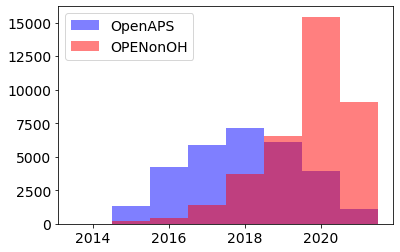

In [20]:
df10 = df_per_day["OpenAPS"]
df10["year"] = df10["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)

min_, max_ = min(df2["year"].min(),df10["year"].min()), max(df2["year"].max(),df10["year"].max())
print(min_, max_)
counts_OpenAPS, bins_OpenAPS = np.histogram(df10["year"], bins=[min_ - 0.5, max_ + 0.5])
counts_OPENonOH, bins_OPENonOH = np.histogram(df2["year"], bins=[min_ - 0.5, max_ + 0.5])
#min_, max_ = df10["year"].min(), df10["year"].max()
plt.hist(df10["year"], bins=np.arange(min_ -0.5, max_ + 0.5), color="blue", label="OpenAPS", alpha=0.5)
#min_, max_ = df2["year"].min(), df2["year"].max()
plt.hist(df2["year"], bins=np.arange(min_ -0.5, max_ + 0.5), color="red", label="OPENonOH", alpha=0.5)


plt.legend()
#plt.stairs(counts_OPENonOH, bins=bins_OPENonOH, color="red", label="OPENonOH")

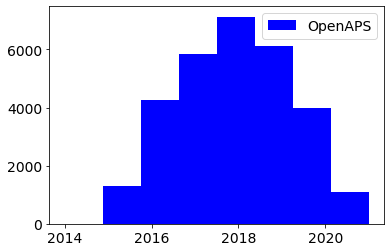

In [21]:
min_, max_ = df10["year"].min(), df10["year"].max()
plt.hist(df10["year"], bins=max_ - min_ + 1, color="blue", label="OpenAPS")
plt.legend()


In [22]:
def df_groupedby(df, gender = "Male", var = "DoW"):
    df_grby = df.loc[df["gender"] == gender, :].groupby(by=var).std()
    df_grby[var] = df_grby.index
    if var == "DoW": 
        df_grby["DoW_str"] = df_grby["DoW"].apply(lambda x: "Monday" if x == 0 else "Tuesday" if x == 1 else "Wednesday" if x == 2 else "Thursday" if x == 3 else "Friday" if x == 4 else "Saturday" if x == 5 else "Sunday")
    return df_grby


In [23]:

df3 = {}
for var in ["DoW", "day", "day"]:
    df3[var] = {}
    for gender in ["Female", "Male"]:
        df3[var][gender] = df_groupedby(df2, gender, var)
print(df3)

{'DoW': {'Female':                id  sgv_mean  sgv_std     year   day  DoW    DoW_str
DoW                                                                
0   34,555,889.25    125.62    35.92 2,019.66 15.63    0     Monday
1   34,304,106.18    125.85    36.67 2,019.67 15.60    1    Tuesday
2   34,179,278.82    127.06    37.14 2,019.67 15.53    2  Wednesday
3   34,315,020.83    126.09    36.50 2,019.66 15.76    3   Thursday
4   34,382,033.15    125.69    37.07 2,019.66 15.78    4     Friday
5   34,431,969.40    125.46    37.38 2,019.67 15.78    5   Saturday
6   34,721,725.54    127.11    37.41 2,019.66 15.63    6     Sunday, 'Male':                id  sgv_mean  sgv_std     year   day  DoW    DoW_str
DoW                                                                
0   34,879,875.25    133.51    34.14 2,019.77 15.81    0     Monday
1   34,798,940.14    131.73    33.25 2,019.76 15.73    1    Tuesday
2   34,812,364.21    131.66    33.80 2,019.77 15.65    2  Wednesday
3   34,791,524.27   

# Average statistics using timeseries breakdown on daily basis and classification based on gender

In [24]:
path = r'OpenAPS_AAPS_Uploader_per_day.csv'  # specify data path
demographics_path = r''  # specify data path

df_demographics = pd.read_csv(demographics_path, index_col=None)

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]

patient_unstrip_IDs = [i.split('_entries', 1)[0] for i in files]

patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]

df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

i = 0

Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []
Saturday = []
Sunday = []
demographics = []

i = 0

for f in files:

    patient_demographic = df_demographics[(df_demographics['id'] == int(
        df_id_files.id[i]))]

    if not patient_demographic.empty:
        demographics.append(patient_demographic)

        p = os.path.join(path, f)

        print("Patient ID: ", int(df_id_files.id[i]))

        # reading and processing files
        df = pd.read_csv(p, index_col=None, na_values=" null")
        df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')

        df = df[~df.index.duplicated(keep='first')]  #remove duplicate indexes
        df = df[df['glucose'] > 39]  # remove everything less than 39
        df = df[df['glucose'] < 1000]  # remove everything greater than 40
        df['glucose'].values[
            df['glucose'] >
            400] = 400  # anything greater than 400 replace with 400

        df['Dateonly'] = df["Date"].str.split("/", n=2,
                                              expand=True)[2].astype(int)

        ## statistics
        Monday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Monday']).describe().transpose())
        Tuesday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Tuesday']).describe().transpose())
        Wednesday.append(
            pd.DataFrame(df['glucose'].loc[
                df['DoW'] == 'Wednesday']).describe().transpose())
        Thursday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Thursday']).describe().transpose())
        Friday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Friday']).describe().transpose())
        Saturday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Saturday']).describe().transpose())
        Sunday.append(
            pd.DataFrame(df['glucose'].loc[df['DoW'] ==
                                           'Sunday']).describe().transpose())

    i = i + 1

FileNotFoundError: [Errno 2] Datei oder Verzeichnis nicht gefunden: ''

In [25]:
monday = pd.concat(Monday)  # convert statistics to dataframe
monday.reset_index(drop=True, inplace=True)
tuesday = pd.concat(Tuesday)
tuesday.reset_index(drop=True, inplace=True)
wednesday = pd.concat(Wednesday)
wednesday.reset_index(drop=True, inplace=True)
thursday = pd.concat(Thursday)
thursday.reset_index(drop=True, inplace=True)
friday = pd.concat(Friday)
friday.reset_index(drop=True, inplace=True)
saturday = pd.concat(Saturday)
saturday.reset_index(drop=True, inplace=True)
sunday = pd.concat(Sunday)
sunday.reset_index(drop=True, inplace=True)

all_stats3 = pd.concat(demographics)
all_stats3.reset_index(drop=True, inplace=True)
all_stats3 = all_stats3.drop(all_stats3.tail(7).index)
all_stats3 = all_stats3.filter(
    ['id', 'height', 'weight', 'age', 'gender', 'country', 'DIYTech'], axis=1)

monday_statistics = pd.concat([all_stats3, monday], axis=1)
tuesday_statistics = pd.concat([all_stats3, tuesday], axis=1)
wednesday_statistics = pd.concat([all_stats3, wednesday], axis=1)
thursday_statistics = pd.concat([all_stats3, thursday], axis=1)
friday_statistics = pd.concat([all_stats3, friday], axis=1)
saturday_statistics = pd.concat([all_stats3, saturday], axis=1)
sunday_statistics = pd.concat([all_stats3, sunday], axis=1)

NameError: name 'Monday' is not defined

## Save daily output statistics for male and females

In [26]:
result = r'' # specify data path
    
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format

monday_stats_m = monday_statistics[(monday_statistics['gender'] == 'Male')]
monday_stats_m.reset_index(drop=True)
monday_stats_m.to_csv(os.path.join(result, "monday_stats_m.csv"))

monday_stats_f = monday_statistics[(monday_statistics['gender'] == 'Female')]
monday_stats_f.reset_index(drop=True)
monday_stats_f.to_csv(os.path.join(result, "monday_stats_f.csv"))

NameError: name 'monday_statistics' is not defined

# Plot daily average statistics

In [3]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/daily/'  # specify data path

extension = 'csv'

OPENonOH_only = False

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
days = [i.split('_', 1)[0][0].upper() + i.split('_', 1)[0][1:] for i in files]  # capitalize first letter

i = 0
mean = []
std = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean.append(df['mean'].mean())
    std.append(df['std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'days': days,
    'mean': mean,
    'std': std,
    'data': files_unstrip_IDs,
})

all_stat = pd.concat([stats], axis=1)

all_stat.sort_values('data', inplace=True, ascending=False)
all_stat.reset_index(drop=True, inplace=True)

statt = all_stat[['mean', 'data', 'days', 'std']].sort_values('data')

sorter = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
]
sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['Day_id'] = statt.index
statt['Day_id'] = statt['days'].map(sorterIndex)

statt.sort_values('Day_id', inplace=True)

print(statt)

da_f = statt[statt['data'] == 'stats_f.csv']
da_m = statt[statt['data'] == 'stats_m.csv']

print("OpenAPS:")
print("female mean min: ", da_f['mean'].min(), da_f.loc[da_f['mean'].min()==da_f['mean'], 'days'])
print("female mean max: ", da_f['mean'].max(), da_f.loc[da_f['mean'].max()==da_f['mean'], 'days'])
print("male mean min: ", da_m['mean'].min(), da_m.loc[da_m['mean'].min()==da_m['mean'], 'days'])
print("male mean max: ", da_m['mean'].max(), da_m.loc[da_m['mean'].max()==da_m['mean'], 'days'])

print("OPENonOH: mean")
print("female mean min: ", df3["DoW"]["Female"]['sgv_mean'].min(), df3["DoW"]["Female"].loc[df3["DoW"]["Female"]['sgv_mean'].min()==df3["DoW"]["Female"]['sgv_mean_mean'], 'DoW_str'].values[0])
print("female mean max: ", df3["DoW"]["Female"]['sgv_mean_mean'].max(), df3["DoW"]["Female"].loc[df3["DoW"]["Female"]['sgv_mean_mean'].max()==df3["DoW"]["Female"]['sgv_mean_mean'], 'DoW_str'].values[0])
print("male mean min: ", df3["DoW"]["Male"]['sgv_mean_mean'].min(), df3["DoW"]["Male"].loc[df3["DoW"]["Male"]['sgv_mean_mean'].min()==df3["DoW"]["Male"]['sgv_mean_mean'], 'DoW_str'].values[0])
print("male mean max: ", df3["DoW"]["Male"]['sgv_mean_mean'].max(), df3["DoW"]["Male"].loc[df3["DoW"]["Male"]['sgv_mean'].max()==df3["DoW"]["Male"]['sgv_mean'], 'DoW_str'].values[0])

print("OPENonOH: std")
print("female std min: ", df3["DoW"]["Female"]['sgv_std'].min(), df3["DoW"]["Female"].loc[df3["DoW"]["Female"]['sgv_std'].min()==df3["DoW"]["Female"]['sgv_std'], 'DoW_str'].values[0])
print("female_std max: ", df3["DoW"]["Female"]['sgv_std'].max(), df3["DoW"]["Female"].loc[df3["DoW"]["Female"]['sgv_std'].max()==df3["DoW"]["Female"]['sgv_std'], 'DoW_str'].values[0])
print("male std min: ", df3["DoW"]["Male"]['sgv_std'].min(), df3["DoW"]["Male"].loc[df3["DoW"]["Male"]['sgv_std'].min()==df3["DoW"]["Male"]['sgv_std'], 'DoW_str'].values[0])
print("male std max: ", df3["DoW"]["Male"]['sgv_std'].max(), df3["DoW"]["Male"].loc[df3["DoW"]["Male"]['sgv_std'].max()==df3["DoW"]["Male"]['sgv_std'], 'DoW_str'].values[0])

## Plotting data



# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)
if not OPENonOH_only:
    ax = plt.plot(da_f['days'],
              da_f['mean'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(da_m['days'],
              da_m['mean'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Female"]['DoW_str'],
              df3["DoW"]["Female"]['sgv_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Male"]['DoW_str'],
              df3["DoW"]["Male"]['sgv_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Day')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=60)
#plt.show()
plt.savefig('DoW_mean.png')

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(10, 60)
if not OPENonOH_only:
    ax = plt.plot(da_f['days'],
              da_f['std'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(da_m['days'],
              da_m['std'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Female"]['DoW_str'],
              df3["DoW"]["Female"]['sgv_std'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["DoW"]["Male"]['DoW_str'],
              df3["DoW"]["Male"]['sgv_std'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])

plt.xlabel('Day')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=60)
#plt.show()
plt.savefig('DoW_std.png')


          mean         data       days        std  Day_id
7   145.991885  stats_f.csv     Monday  54.142251       0
6   139.903664  stats_m.csv     Monday  49.648345       0
9   142.907360  stats_f.csv    Tuesday  50.759602       1
5   139.275358  stats_m.csv    Tuesday  49.476195       1
13  145.437042  stats_f.csv  Wednesday  53.050468       2
1   137.489728  stats_m.csv  Wednesday  48.286131       2
10  143.083965  stats_f.csv   Thursday  52.389695       3
2   137.783317  stats_m.csv   Thursday  49.298467       3
12  139.867508  stats_f.csv     Friday  51.236093       4
3   137.716681  stats_m.csv     Friday  50.270050       4
8   142.275482  stats_f.csv   Saturday  52.319166       5
0   138.951860  stats_m.csv   Saturday  51.097192       5
11  144.177155  stats_f.csv     Sunday  52.878827       6
4   138.976382  stats_m.csv     Sunday  50.146490       6
OpenAPS:
female mean min:  139.86750774398735 12    Friday
Name: days, dtype: object
female mean max:  145.9918850664425 7    Mond

NameError: name 'df3' is not defined

# Plot hourly average statistics

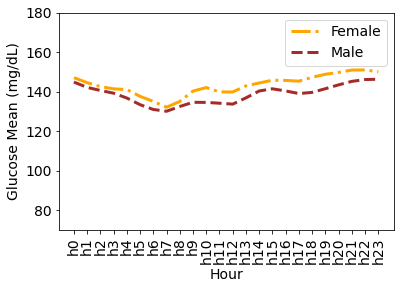

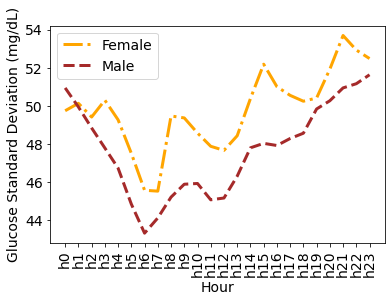

hours      mean_m      std_m      mean_f      std_f  hour_id
8     h0  144.852227  50.932793  147.095983  49.733986        0
2     h1  142.171011  49.933113  144.552438  50.124410        1
15    h2  140.616969  48.828701  142.582262  49.404791        2
18    h3  139.231543  47.776770  141.429448  50.288675        3
19    h4  136.781015  46.717217  141.074636  49.256849        4
0     h5  133.424248  44.829261  137.647481  47.497692        5
3     h6  130.993650  43.303572  135.052980  45.556819        6
9     h7  130.090866  44.103694  132.127052  45.511040        7
7     h8  132.510147  45.196226  135.067054  49.458582        8
21    h9  134.627697  45.873938  140.293890  49.357249        9
13   h10  134.565108  45.912863  142.085692  48.562146       10
17   h11  134.163281  45.056089  139.895787  47.866445       11
6    h12  133.701878  45.149834  139.855217  47.652037       12
20   h13  136.873126  46.297839  142.922810  48.420473       13
16   h14  140.348531  47.786282  144.396029  50.372257       14
12   h15  141.456281  48.021158  145.793860  52.179375       15
22   h16  140.373190  47.908177  145.698111  50.999424       16
23   h17  139.049034  48.275933  145.324948  50.541866       17
14   h18  139.643625  48.553425  147.268054  50.234086       18
4    h19  141.499595  49.826420  148.809239  50.401923       19
11   h20  143.440169  50.258265  149.727574  51.916420       20
1    h21  145.219863  50.933492  150.934921  53.686512       21
10   h22  146.127541  51.153669  150.991263  52.922548       22
5    h23  146.305825  51.623383  150.091582  52.475283       23

In [4]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/hourly/'  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
hours = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'hours': hours,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('hours')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
    'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
    'h22', 'h23'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['hour_id'] = statt.index
statt['hour_id'] = statt['hours'].map(sorterIndex)

statt.sort_values('hour_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(70, 180)
ax = plt.plot(statt['hours'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['hours'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()
statt

In [21]:
path = "/home/reinhold/Daten/Paper_Datasets_Nov2022/results/hourly_OPENonOH"
df_hourly_F = pd.read_csv(os.path.join(path,"OPENonOH_hourly_Female.csv"))
df_hourly_M = pd.read_csv(os.path.join(path,"OPENonOH_hourly_Male.csv"))


df4_F = df_hourly_F.groupby(by="hour", as_index=False).agg({"sgv_mean": "mean", "sgv_std": "mean", "pm_id": "count"})
df4_M = df_hourly_M.groupby(by="hour", as_index=False).agg({"sgv_mean": "mean", "sgv_std": "mean", "pm_id": "count"})

sorter = [
    'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
    'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
    'h22', 'h23'
]

df4_F.reset_index(drop=True, inplace=True)
df4_M.reset_index(drop=True, inplace=True)
df4_F.columns = ["hour", "sgv_mean_mean", "sgv_std_mean", "pm_id_count"]
df4_M.columns = ["hour", "sgv_mean_mean", "sgv_std_mean", "pm_id_count"]
df4_F["hour"] = sorter
df4_M["hour"] = sorter
df4_F.info()
df4_M.info()

print(df4_F.head())
print(df4_M.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           24 non-null     object 
 1   sgv_mean_mean  24 non-null     float64
 2   sgv_std_mean   24 non-null     float64
 3   pm_id_count    24 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 896.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           24 non-null     object 
 1   sgv_mean_mean  24 non-null     float64
 2   sgv_std_mean   24 non-null     float64
 3   pm_id_count    24 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 896.0+ bytes
  hour  sgv_mean_mean  sgv_std_mean  pm_id_count
0   h0     129.673530     42.559216           23
1   h1     128.794640     40.113278 

OpenAPS: mean
female mean min:  132.1270518624061 h7
female mean max:  150.99126317558077 h22
male mean min:  130.09086631404864 h7
male mean max:  146.30582469359433 h23
OpenAPS: std
female std min:  45.51103999456869 h7
female std max:  53.68651243320436 h21
male std min:  43.3035718954359 h6
male std max:  51.62338334646788 h23
OPENonOH: mean
female mean min:  118.63196822005212 h6
female mean max:  137.3696502733894 h14
male mean min:  123.03394322786461 h5
male mean max:  140.57926806407787 h21
OPENonOH: std
female std min:  35.11523167253368 h5
female_std max:  46.713196025595636 h17
male std min:  33.725594611716204 h5
male std max:  45.0073722472466 h19


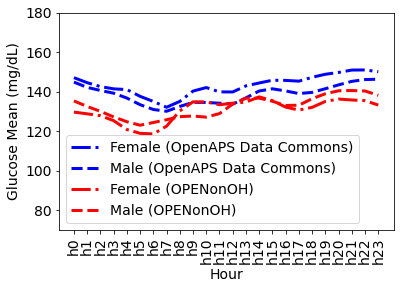

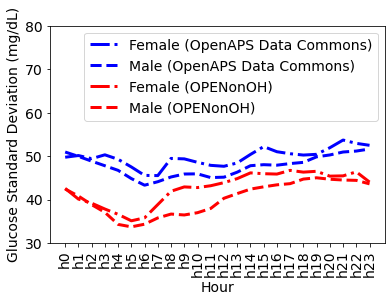

In [25]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/hourly/'  # specify data path

extension = 'csv'

os.chdir(path)

OPENonOH_only = False

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
hours = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'hours': hours,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('hours')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
    'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
    'h22', 'h23'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['hour_id'] = statt.index
statt['hour_id'] = statt['hours'].map(sorterIndex)

statt.sort_values('hour_id', inplace=True)

# print statistical values
print("OpenAPS: mean")
print("female mean min: ", statt['mean_f'].min(), statt.loc[statt['mean_f'].min()==statt['mean_f'], 'hours'].values[0])
print("female mean max: ", statt['mean_f'].max(), statt.loc[statt['mean_f'].max()==statt['mean_f'], 'hours'].values[0])
print("male mean min: ", statt['mean_m'].min(), statt.loc[statt['mean_m'].min()==statt['mean_m'], 'hours'].values[0])
print("male mean max: ", statt['mean_m'].max(), statt.loc[statt['mean_m'].max()==statt['mean_m'], 'hours'].values[0])

print("OpenAPS: std")
print("female std min: ", statt['std_f'].min(), statt.loc[statt['std_f'].min()==statt['std_f'], 'hours'].values[0])
print("female std max: ", statt['std_f'].max(), statt.loc[statt['std_f'].max()==statt['std_f'], 'hours'].values[0])
print("male std min: ", statt['std_m'].min(), statt.loc[statt['std_m'].min()==statt['std_m'], 'hours'].values[0])
print("male std max: ", statt['std_m'].max(), statt.loc[statt['std_m'].max()==statt['std_m'], 'hours'].values[0])

## Plotting data


print("OPENonOH: mean")
print("female mean min: ", df4_F['sgv_mean_mean'].min(), df4_F.loc[df4_F['sgv_mean_mean'].min()==df4_F['sgv_mean_mean'], 'hour'].values[0])
print("female mean max: ", df4_F['sgv_mean_mean'].max(), df4_F.loc[df4_F['sgv_mean_mean'].max()==df4_F['sgv_mean_mean'], 'hour'].values[0])
print("male mean min: ", df4_M['sgv_mean_mean'].min(), df4_M.loc[df4_M['sgv_mean_mean'].min()==df4_M['sgv_mean_mean'], 'hour'].values[0])
print("male mean max: ", df4_M['sgv_mean_mean'].max(), df4_M.loc[df4_M['sgv_mean_mean'].max()==df4_M['sgv_mean_mean'], 'hour'].values[0])

print("OPENonOH: std")
print("female std min: ", df4_F['sgv_std_mean'].min(), df4_F.loc[df4_F['sgv_std_mean'].min()==df4_F['sgv_std_mean'], 'hour'].values[0])
print("female_std max: ", df4_F['sgv_std_mean'].max(), df4_F.loc[df4_F['sgv_std_mean'].max()==df4_F['sgv_std_mean'], 'hour'].values[0])
print("male std min: ", df4_M['sgv_std_mean'].min(), df4_M.loc[df4_M['sgv_std_mean'].min()==df4_M['sgv_std_mean'], 'hour'].values[0])
print("male std max: ", df4_M['sgv_std_mean'].max(), df4_M.loc[df4_M['sgv_std_mean'].max()==df4_M['sgv_std_mean'], 'hour'].values[0])



## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(70, 180)
if not OPENonOH_only:
    ax = plt.plot(statt['hours'],
                statt['mean_f'],
                color='blue',
                linestyle='-.',
                linewidth=3)
    ax = plt.plot(statt['hours'],
                statt['mean_m'],
                color='blue',
                linestyle='--',
                linewidth=3)
ax = plt.plot(df4_F['hour'],
              df4_F['sgv_mean_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df4_M['hour'],
              df4_M['sgv_mean_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)


if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])

plt.xlabel('Hour')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

if not OPENonOH_only:
    ax = plt.plot(statt['hours'],
                statt['std_f'],
                color='blue',
                linestyle='-.',
                linewidth=3)
    ax = plt.plot(statt['hours'],
                statt['std_m'],
                color='blue',
                linestyle='--',
                linewidth=3)

ax = plt.plot(df4_F['hour'],
              df4_F['sgv_std_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df4_M['hour'],
              df4_M['sgv_std_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.ylim((30, 50))
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.ylim((30, 80))
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])

plt.xlabel('Hour')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()






# Average Statistics based on Monthly Breakdown 

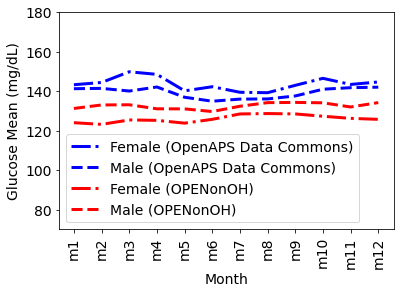

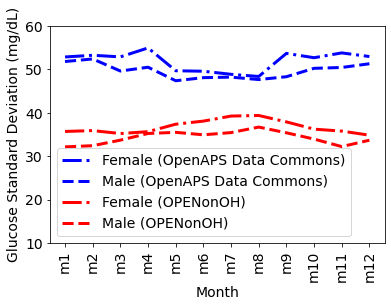

In [43]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/monthly/'  # specify data path

OPENonOH_only = False

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
months = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'months': months,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('months')

sorter = [
    'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['month_id'] = statt.index
statt['month_id'] = statt['months'].map(sorterIndex)

statt.sort_values('month_id', inplace=True)

#df3["day"]["Female"].reset_index(inplace=True)
#reset_index(inplace=True)
#df3["month"]["Male"].reset_index(inplace=True)

#print(df3["month"]["Female"]["month"])
df3["month"]["Female"]["month_str"] = df3["month"]["Female"]['month'].apply(lambda x: f"m{x}")
df3["month"]["Female"]["month_id"] = df3["month"]["Female"]['month_str'].map(sorterIndex)
df3["month"]["Female"].sort_values('month_id', inplace=True)

#df3["month"]["Male"].sort_values('month', inplace=True)
df3["month"]["Male"]["month_str"] = df3["month"]["Male"]['month'].apply(lambda x: f"m{x}")
df3["month"]["Male"]["month_id"] = df3["month"]["Male"]['month_str'].map(sorterIndex)
df3["month"]["Male"].sort_values('month_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

if not OPENonOH_only:
    ax = plt.plot(statt['months'],
              statt['mean_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['months'],
              statt['mean_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["month"]["Female"]['month_str'],
              df3["month"]["Female"]['sgv_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["month"]["Male"]['month_str'],
              df3["month"]["Male"]['sgv_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(10, 60)

if not OPENonOH_only:
    ax = plt.plot(statt['months'],
              statt['std_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['months'],
              statt['std_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["month"]["Female"]['month_str'],
              df3["month"]["Female"]['sgv_std'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["month"]["Male"]['month_str'],
              df3["month"]["Male"]['sgv_std'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)

if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()

# Average Statistics based on Date of Month Breakdown 

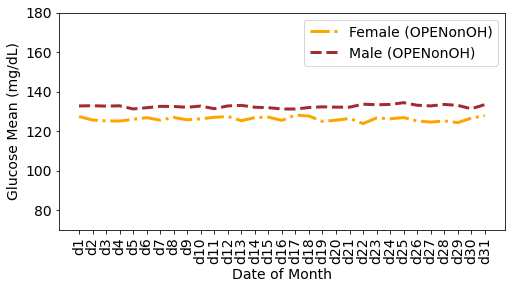

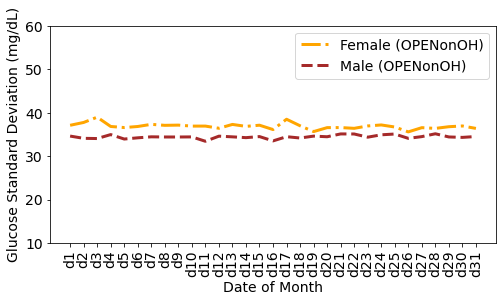

In [40]:
path = r'/home/reinhold/Daten/Paper_Datasets_Nov2022/results/dateofmonth/'  # specify data path

OPENonOH_only = True

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
date = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'date': date,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('date')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
    'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
    'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['date_id'] = statt.index
statt['date_id'] = statt['date'].map(sorterIndex)

statt.sort_values('date_id', inplace=True)

## Plotting data
df3["day"]["Female"]["day_str"] = df3["day"]["Female"]['day'].apply(lambda x: f"d{x}")
df3["day"]["Female"]["day_id"] = df3["day"]["Female"]['day_str'].map(sorterIndex)
df3["day"]["Female"].sort_values('day_id', inplace=True)

df3["day"]["Male"]["day_str"] = df3["day"]["Male"]['day'].apply(lambda x: f"d{x}")
df3["day"]["Male"]["day_id"] = df3["day"]["Male"]['day_str'].map(sorterIndex)
df3["day"]["Male"].sort_values('day_id', inplace=True)

# Designate a figure size and font size
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)
if not OPENonOH_only:
    ax = plt.plot(statt['date'],
              statt['mean_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['date'],
              statt['mean_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["day"]["Female"]['day_str'],
              df3["day"]["Female"]['sgv_mean'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["day"]["Male"]['day_str'],
              df3["day"]["Male"]['sgv_mean'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)
if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(10, 60)
if not OPENonOH_only:
    ax = plt.plot(statt['date'],
              statt['std_f'],
              color='blue',
              linestyle='-.',
              linewidth=3)
    ax = plt.plot(statt['date'],
              statt['std_m'],
              color='blue',
              linestyle='--',
              linewidth=3)
ax = plt.plot(df3["day"]["Female"]['day_str'],
              df3["day"]["Female"]['sgv_std'],
              color='orange' if OPENonOH_only else 'red',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(df3["day"]["Male"]['day_str'],
              df3["day"]["Male"]['sgv_std'],
              color='brown' if OPENonOH_only else 'red',
              linestyle='--',
              linewidth=3)
if OPENonOH_only:
    plt.legend(['Female (OPENonOH)', 'Male (OPENonOH)'])
else:
    plt.legend(['Female (OpenAPS Data Commons)', 'Male (OpenAPS Data Commons)', 'Female (OPENonOH)', 'Male (OPENonOH)'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()
